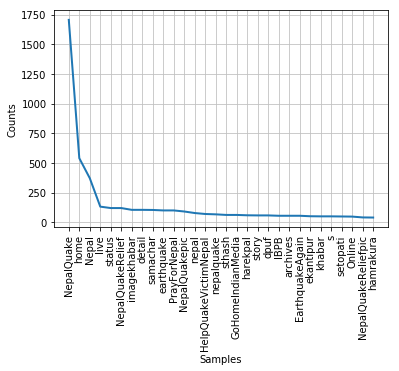

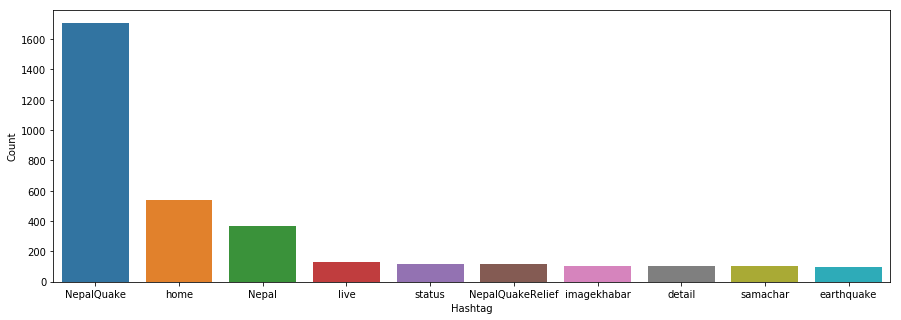

0       1096820244478193665
1       1096793549096534017
2       1096787214950748160
3       1088093962605338624
4       1019416252249300992
5       1014804269801918464
6       1012197748186025984
7       1011111770931462144
8       1000574604786651137
9        993360361142280193
10       990135701571358720
11       989897449572569088
12       989897069291810816
13       989894278678753280
14       989893205800968194
15       989892531226861569
16       989892240670507009
17       989891883211124738
18       989891523457273861
19       989890947814223872
20       989890568129007616
21       989844267584643072
22       989791544398970882
23       989766807014727681
24       989764841484136448
25       989751924281917440
26       989738881737146369
27       989730145207373825
28       989717936414769152
29       989717436969570304
               ...         
7430     591898761778987008
7431     591897400798781440
7432     591896700526071809
7433     591895190375268352
7434     59189509076

In [41]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from nltk import FreqDist
import warnings 
from nltk.stem.porter import  *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import brown
from nltk.collocations import *
from sklearn.feature_extraction.text import TfidfVectorizer

#stop_words = set(stopwords.words('english'))



train = pd.read_csv('/home/rrahul/Desktop2/Till_August/Project_sem_5/kerala_flood/nepal.csv')
#print (train['text'])
tweets=train['text']



train['text'] = train['text'].str.replace("[^a-zA-Z#]", " ") 

#Removing Short Words

train['text'] = train['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))



#tokenization
tokenized_tweet = train['text'].apply(lambda x: x.split())


#print (tokenized_tweet)
#Stemming is done in this part
stemmer = PorterStemmer()

#tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])
#print(tokenized_tweet)
new_tweet=tokenized_tweet
#print(new_tweet)


#join all tokenized and stemmed tokens together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])
train['text'] = tokenized_tweet
#print(train['text'].head())

# removing https:// and URLs


   
    

#creating a .csv file storing values




#print(tweets)
def hashtag_extract(x):
    hashtag=[]
    for i in x:
        ht =re.findall(r"(\w+)", i)
        hashtag.append(ht)
        
    return hashtag

# extracting hashtags from tweets
HT_regular = hashtag_extract(train['text'])

cleaned_tweet=HT_regular
#print(cleaned_tweet)



HT_regular = sum(HT_regular,[])
import goslate
HT1_regular=list()
for word in HT_regular:
    #print(word)
    gs = goslate.Goslate()
    #new.append(gs.translate(word,'en'))
    HT1_regular.append(word)
    
#print(HT1_regular)

#Plotting  hastag
a = nltk.FreqDist(HT_regular)
a.plot(30)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(15,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')

plt.savefig('/home/rrahul/Desktop/figure_1.png',dpi=100)
plt.show()

#Location
location=train['id']
#print(location)

In [40]:
bigram = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(new_tweet,5)
finder.apply_freq_filter(5)


#print(finder.nbest(bigram.likelihood_ratio, 10))


#applying tf-idf vectorizer

tfidf_vector=TfidfVectorizer(use_idf=True,ngram_range=(1,3))
tfidf_matrix = tfidf_vector.fit_transform(new_tweet)
feature_names = tfidf_vector.get_feature_names()
from sklearn.metrics.pairwise import cosine_similarity

#dist=1-cosine_similarity(tfidf_matrix)
#print(dist)

#clustering is done here
from sklearn.cluster import KMeans 
num_clusters=5
km=KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
train['cluster_id']=clusters
print(train['cluster_id'].value_counts())

order_clusters = km.cluster_centers_.argsort()[:, ::-1]

from sklearn.cluster import KMeans 
num_clusters=5
km=KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
train['cluster_id']=clusters
print(km)
print(train['cluster_id'].value_counts())

order_clusters = km.cluster_centers_.argsort()[:, ::-1] 

count2=0
for i in range(num_clusters):
    
    
    print("Clusters {}:Words ".format(i))
    for j in order_clusters[i, :10]: 
        count2=count2+1
        print(' %s' % feature_names[j])
        
print(count2) 

0    7069
2     271
1      91
3      28
4       1
Name: cluster_id, dtype: int64
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
2    7096
3     271
1      91
4       1
0       1
Name: cluster_id, dtype: int64
Clusters 0:Words 
 hywu
 nepalquake pywg nzjlu
 pywg nzjlu
 pywg nzjlu hywu
 nzjlu hywu
 nzjlu
 pywg
 nepalquake pywg
 nepalquake
 instagram wmgv
Clusters 1:Words 
 nepal
 nepalquake nepal
 nepalquake
 nepal nepalquake
 zzmczj
 instagram zqvha
 iodet
 internet user surmandal
 internet user
 internet
Clusters 2:Words 
 nepalquake
 home
 home nepalquake
 prayfornepal
 nepal
 earthquake
 nepalquakerelief
 aftershock
 gohomeindianmedia
 live
Clusters 3:Words 
 nepalquake
 zzmczj
 ioe
 iodet
 internet user surmandal
 internet user
 internet
 international media communiques
 international media
 international
Clusters 4:Words 
 rywv
 nepalquake rywv
 h

In [5]:
from nltk.corpus import stopwords